Ricky's Working Notebook

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
con = sqlite3.connect('Data/im.db')

In [5]:
pd.read_sql('''

SELECT *
FROM sqlite_master

''', con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
#Gotta check on my little brother
pd.read_sql('''

SELECT *
FROM principals
    JOIN persons
        USING(person_id)
    JOIN movie_basics
        USING(movie_id)
WHERE primary_name = 'Nick Robinson'

''', con)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0835802,2,nm3538718,actor,None,"[""Taylor Ogburn""]",Nick Robinson,1995.0,None,"actor,soundtrack",Krystal,Krystal,2017,90.0,"Comedy,Drama"
1,tt2179116,1,nm3538718,actor,None,"[""Joe""]",Nick Robinson,1995.0,None,"actor,soundtrack",The Kings of Summer,The Kings of Summer,2013,95.0,"Adventure,Comedy,Drama"
2,tt2866708,4,nm3538718,actor,None,"[""Philip""]",Nick Robinson,1995.0,None,"actor,soundtrack",Strange But True,Strange But True,2019,NaN,Thriller
3,tt4353270,2,nm3538718,actor,None,"[""Lance Zutterland""]",Nick Robinson,1995.0,None,"actor,soundtrack",Echo Boomers,Echo Boomers,2019,NaN,"Action,Crime,Drama"
4,tt4630444,1,nm3538718,actor,None,"[""Charlie Mills""]",Nick Robinson,1995.0,None,"actor,soundtrack",Being Charlie,Being Charlie,2015,97.0,"Drama,Romance"
5,tt5001718,2,nm3538718,actor,None,"[""Olly""]",Nick Robinson,1995.0,None,"actor,soundtrack","Everything, Everything","Everything, Everything",2017,96.0,"Drama,Romance"
6,tt5164432,1,nm3538718,actor,None,"[""Simon""]",Nick Robinson,1995.0,None,"actor,soundtrack","Love, Simon","Love, Simon",2018,110.0,"Comedy,Drama,Romance"
7,tt6566768,3,nm3538718,actor,None,"[""Jan""]",Nick Robinson,1995.0,None,"actor,soundtrack",Native Son,Native Son,2019,104.0,Drama


In [7]:
pd.read_sql('''

SELECT *
FROM movie_basics
LIMIT 15
        
''', con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [33]:
#reading in financial data csv
tn_data = pd.read_csv('Data/tn.movie_budgets.csv')
bom_data = pd.read_csv('Data/bom.movie_gross.csv')
kaggle_data = pd.read_csv('Data/movie_statistic_dataset.csv')
inflation_data  = pd.read_csv('Data/US_CPI.csv')

In [9]:

tn_data['production_budget'] = tn_data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['domestic_gross'] = tn_data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['worldwide_gross'] = tn_data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [10]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [11]:
tn_data = tn_data[tn_data['production_budget'] != 0]

In [12]:
tn_and_bom = tn_data.merge(bom_data, left_on='movie', right_on='title', how='left')

In [13]:
#tn_and_bom[(tn_and_bom['domestic_gross_x']==0) & (tn_and_bom['domestic_gross_y'].notnull)]
tn_and_bom = tn_and_bom[(tn_and_bom['domestic_gross_x'] != 0) | (tn_and_bom['domestic_gross_y'].notnull())]

In [14]:
#Now we learned that the bom data set only has info for 8 movies not in the tn data set so we can stop looking. 
tn_and_bom[tn_and_bom['domestic_gross_x']==0 & (tn_and_bom['domestic_gross_y'].notnull())]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
2850,51,"Nov 14, 2014",Wolves,18000000.0,0.0,94953.0,Wolves,KE,12100.0,NaN,2014.0
3153,54,"Dec 6, 2013",Khumba,15000000.0,0.0,20898221.0,Khumba,MNE,1000.0,27200000,2013.0
4463,64,"Jun 6, 2014",Anna,4357373.0,0.0,1200000.0,Anna,VE,4300.0,NaN,2014.0
4768,69,"Sep 18, 1967",Point Blank,3000000.0,0.0,0.0,Point Blank,Magn.,708000.0,8500000,2011.0
4865,66,"Jan 19, 2016",Eden,2300000.0,0.0,0.0,Eden,BG,65500.0,NaN,2015.0
5330,31,"Dec 31, 2012",Trance,950000.0,0.0,0.0,Trance,FoxS,2300000.0,21900000,2013.0
5351,52,"Dec 31, 2012",Snitch,850000.0,0.0,0.0,Snitch,LG/S,42900000.0,NaN,2013.0
5415,16,"Mar 4, 2016",They Will Have to Kill Us First,600000.0,0.0,7943.0,They Will Have to Kill Us First,BBC,7500.0,NaN,2016.0


In [15]:
tn_data = tn_data[tn_data['domestic_gross'] != 0]

In [16]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 286.2+ KB


In [17]:
money_data = kaggle_data.merge(tn_data, left_on='movie_title', right_on='movie', how='outer')

In [18]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09


In [19]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4527 non-null   object 
 1   production_date       4527 non-null   object 
 2   genres                4527 non-null   object 
 3   runtime_minutes       4527 non-null   float64
 4   director_name         4527 non-null   object 
 5   director_professions  4527 non-null   object 
 6   director_birthYear    4527 non-null   object 
 7   director_deathYear    4527 non-null   object 
 8   movie_averageRating   4527 non-null   float64
 9   movie_numerOfVotes    4527 non-null   float64
 10  approval_Index        4527 non-null   float64
 11  Production budget $   4527 non-null   float64
 12  Domestic gross $      4527 non-null   float64
 13  Worldwide gross $     4527 non-null   float64
 14  id                    5434 non-null   float64
 15  release_date         

In [20]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09


In [49]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,...,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN,2022
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,...,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,...,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,...,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,...,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018


In [22]:
#With these 2 datasets, when we have the Kaggle data we want to keep that but we want to fill in with TN data for films we don't have in our Kaggle dataset.

In [48]:

money_data['Production budget $'].fillna(money_data['production_budget'], inplace=True)
money_data['Domestic gross $'].fillna(money_data['domestic_gross'], inplace=True)
money_data['Worldwide gross $'].fillna(money_data['worldwide_gross'], inplace=True)
money_data['movie_title'].fillna(money_data['movie'], inplace=True)
money_data['production_date'].fillna(money_data['release_date'], inplace=True)
money_data['production_date'] = pd.to_datetime(money_data['production_date'], errors='coerce')
money_data['year'] = money_data['production_date'].dt.year
print(money_data.head())

                                   movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -

In [47]:
print(money_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           5758 non-null   object        
 1   production_date       5758 non-null   datetime64[ns]
 2   genres                4527 non-null   object        
 3   runtime_minutes       4527 non-null   float64       
 4   director_name         4527 non-null   object        
 5   director_professions  4527 non-null   object        
 6   director_birthYear    4527 non-null   object        
 7   director_deathYear    4527 non-null   object        
 8   movie_averageRating   4527 non-null   float64       
 9   movie_numerOfVotes    4527 non-null   float64       
 10  approval_Index        4527 non-null   float64       
 11  Production budget $   5758 non-null   float64       
 12  Domestic gross $      5758 non-null   float64       
 13  Worldwide gross $ 

In [34]:
#next step: derived columns - costs and gross adjusted to year
inflation_data.head()


,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [38]:
print(money_data[money_data['production_date'].isna()])

                                       movie_title production_date genres  \
4527                                  Dark Phoenix             NaT    NaN   
4528             Star Wars Ep. VIII: The Last Jedi             NaT    NaN   
4529          Star Wars Ep. VII: The Force Awakens             NaT    NaN   
4530    Pirates of the Caribbean: At Worldâs End             NaT    NaN   
4531  Pirates of the Caribbean: Dead Manâs Chest             NaT    NaN   
...                                            ...             ...    ...   
5753                                        Cavite             NaT    NaN   
5754                               The Mongol King             NaT    NaN   
5755                                     Following             NaT    NaN   
5756                 Return to the Land of Wonders             NaT    NaN   
5757                             My Date With Drew             NaT    NaN   

      runtime_minutes director_name director_professions director_birthYear

In [50]:
# Base year for inflation adjustment (choose the latest year in your dataset)
base_year = inflation_data['Year'].max()
base_cpi = inflation_data[inflation_data['Year'] == base_year]['CPI'].values[0]

# Merge inflation data with movie data
money_data = pd.merge(money_data, inflation_data, how='left', left_on='year', right_on='Year')

# Adjust values
money_data['adjusted_production_budget'] = (money_data['Production budget $'] * base_cpi) / money_data['CPI']
money_data['adjusted_domestic_gross'] = (money_data['Domestic gross $'] * base_cpi) / money_data['CPI']
money_data['adjusted_worldwide_gross'] = (money_data['Worldwide gross $'] * base_cpi) / money_data['CPI']

# Drop unnecessary columns from the merge
money_data.drop(columns=['Year', 'CPI'], inplace=True)

# Preview adjusted data
print(money_data[['movie_title', 'year', 'adjusted_production_budget', 'adjusted_domestic_gross', 'adjusted_worldwide_gross']].head())


                movie_title  year  adjusted_production_budget  \
0  Avatar: The Way of Water  2022                         NaN   
1         Avengers: Endgame  2019                4.156846e+08   
2         Avengers: Endgame  2019                4.139349e+08   
3         Avengers: Endgame  2019                4.116128e+08   
4         Avengers: Endgame  2019                4.094448e+08   

   adjusted_domestic_gross  adjusted_worldwide_gross  
0                      NaN                       NaN  
1             8.920311e+08              2.904317e+09  
2             8.882763e+08              2.892092e+09  
3             8.832933e+08              2.875868e+09  
4             8.786409e+08              2.860721e+09  


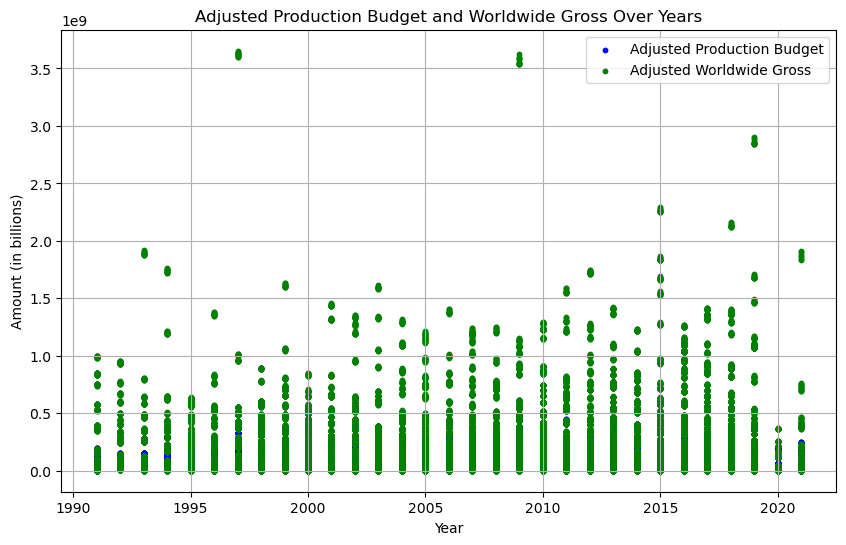

In [65]:
# Comparison of annual adjusted production budget and worldwide revenues
filtered_data = money_data[money_data['year'] > 1990]

# Scatter plot için marker boyutunu küçültme
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['year'], filtered_data['adjusted_production_budget'], label='Adjusted Production Budget', color='blue', s=10)  # 's' parametresi boyut
plt.scatter(filtered_data['year'], filtered_data['adjusted_worldwide_gross'], label='Adjusted Worldwide Gross', color='green', s=10)
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.title('Adjusted Production Budget and Worldwide Gross Over Years')
plt.legend()
plt.grid(True)
plt.show()

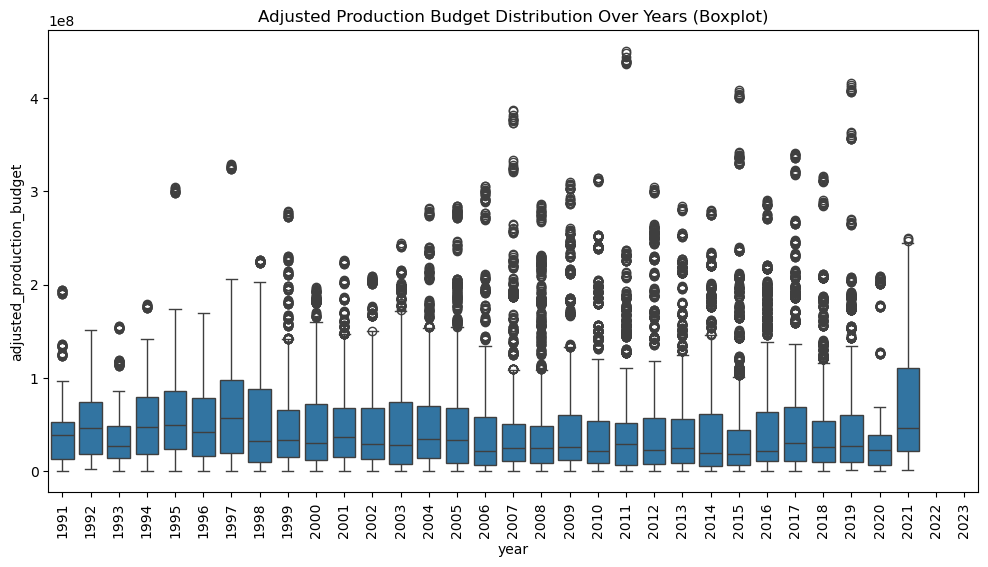

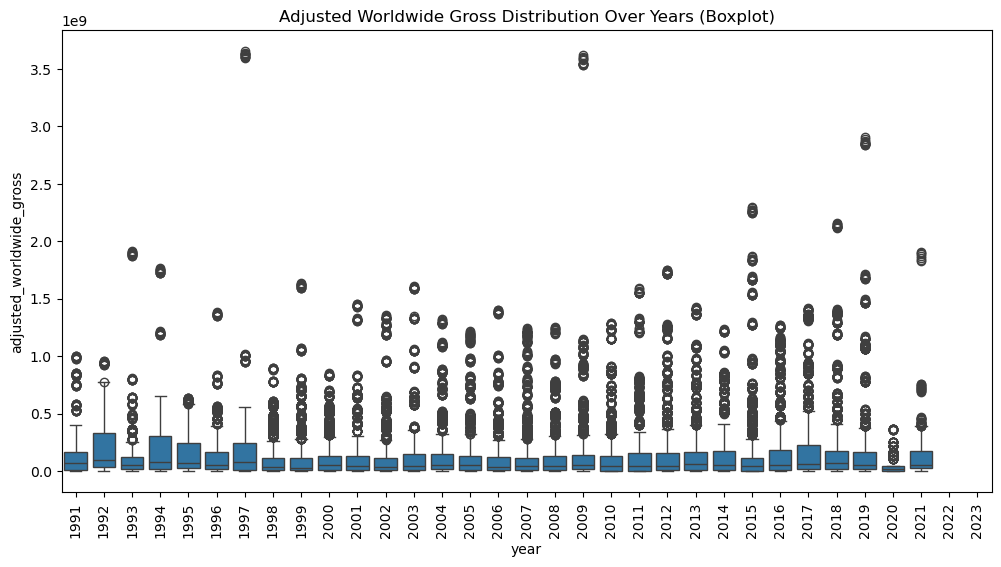

In [66]:
# Distribution by years with boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_production_budget', data=filtered_data)
plt.xticks(rotation=90)  # X eksenindeki yılları net görmek için döndürme
plt.title('Adjusted Production Budget Distribution Over Years (Boxplot)')
plt.show()

# Likewise for Worldwide Gross
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_worldwide_gross', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Adjusted Worldwide Gross Distribution Over Years (Boxplot)')
plt.show()

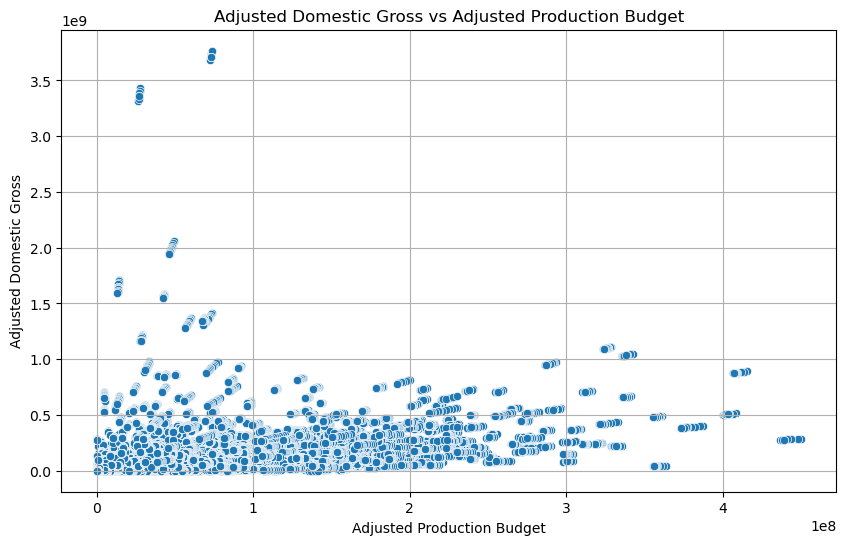

In [64]:
#Domestic Revenue and Production Budget Adjusted with Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=money_data['adjusted_production_budget'], y=money_data['adjusted_domestic_gross'])

plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

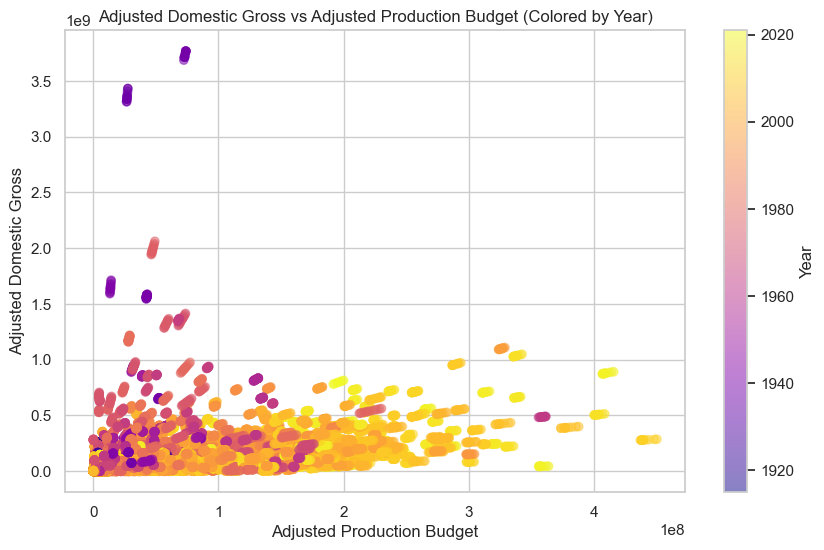

In [78]:
# Scatter plot with production budget and local revenue relationship (colored and clearer)
plt.figure(figsize=(10, 6))

# Adjusting colormap using 'plasma' colormap
plt.figure(figsize=(10, 6))
sc = plt.scatter(money_data['adjusted_production_budget'], 
                 money_data['adjusted_domestic_gross'], 
                 c=money_data['year'], cmap='plasma', alpha=0.5) 
plt.colorbar(sc, label='Year')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.grid(True)
plt.show()


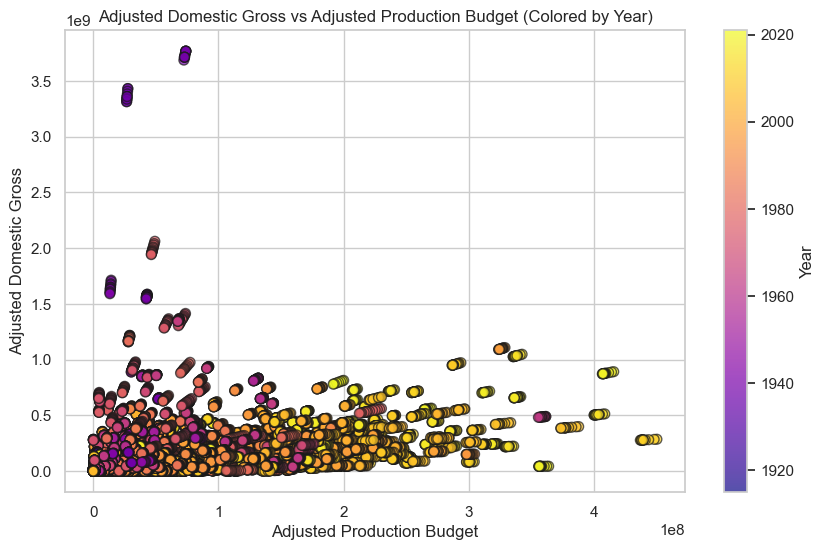

In [80]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot for Adjusted Domestic Gross vs Adjusted Production Budget
plt.figure(figsize=(10, 6))

# Define the scatter plot with better visual parameters
scatter = plt.scatter(money_data['adjusted_production_budget'],
                      money_data['adjusted_domestic_gross'],
                      c=money_data['year'], cmap='plasma', s=50, alpha=0.7, edgecolor='k')

# Add a color bar to indicate the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set titles and labels
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')

# Display the plot
plt.show()

In [83]:
# Step 1: Calculate Adjusted ROI
money_data['adjusted_ROI'] = (money_data['adjusted_worldwide_gross'] - money_data['adjusted_production_budget']) / money_data['adjusted_production_budget']


In [86]:
conn = sqlite3.connect('Data/im.db')

In [88]:
imdb_data = pd.read_sql('SELECT * FROM movie_basics', conn)
conn.close()

In [89]:
print(imdb_data.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [93]:
print(imdb_data.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [94]:
imdb_data['movie_title'] = imdb_data['primary_title'].str.strip()

# Merge the datasets using movie_title
combined_data = pd.merge(imdb_data, money_data, on='movie_title')

# Preview the merged dataset
print(combined_data.head())

    movie_id  primary_title original_title  start_year  runtime_minutes_x  \
0  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
2  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
3  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
4  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   

                   genres_x    movie_title production_date  \
0  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   
1  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   
2  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   
3  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   
4  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   

                   genres_y  runtime_minutes_y  ...          movie  \
0  Action,Adventure,Fantasy              110.0  ...  Mortal Kombat   
1  Action,Adventure,Fant

In [95]:
# Drop unnecessary or duplicate columns
combined_data_cleaned = combined_data.drop(columns=['runtime_minutes_x', 'movie', 'production_date', 'genres_y'])

# Preview the cleaned dataset
print(combined_data_cleaned.head())

    movie_id  primary_title original_title  start_year  \
0  tt0293429  Mortal Kombat  Mortal Kombat        2021   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021   
2  tt0293429  Mortal Kombat  Mortal Kombat        2021   
3  tt0293429  Mortal Kombat  Mortal Kombat        2021   
4  tt0293429  Mortal Kombat  Mortal Kombat        2021   

                   genres_x    movie_title  runtime_minutes_y  director_name  \
0  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
1  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
2  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
3  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
4  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   

  director_professions director_birthYear  ...  release_date  \
0    director,producer                 \N  ...  Aug 18, 1995   
1    director,producer                 \N 

In [96]:
# Fill NaN values with a default value (like 0 or 'Unknown')
combined_data_cleaned.fillna(0, inplace=True)

# Or drop rows with NaN in important columns
combined_data_cleaned.dropna(subset=['runtime_minutes_y', 'production_budget'], inplace=True)

# Preview the cleaned dataset again
print(combined_data_cleaned.head())

    movie_id  primary_title original_title  start_year  \
0  tt0293429  Mortal Kombat  Mortal Kombat        2021   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021   
2  tt0293429  Mortal Kombat  Mortal Kombat        2021   
3  tt0293429  Mortal Kombat  Mortal Kombat        2021   
4  tt0293429  Mortal Kombat  Mortal Kombat        2021   

                   genres_x    movie_title  runtime_minutes_y  director_name  \
0  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
1  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
2  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
3  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   
4  Action,Adventure,Fantasy  Mortal Kombat              110.0  Simon McQuoid   

  director_professions director_birthYear  ...  release_date  \
0    director,producer                 \N  ...  Aug 18, 1995   
1    director,producer                 \N 